# Titanic
https://www.kaggle.com/c/titanic

加入numpy, pandas, matplot等库

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

读入数据

In [2]:
dataset = pd.read_csv('../input/train.csv')
testset = pd.read_csv('../input/test.csv')

In [3]:
dataset.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0, PassengerId：乘客的数字id

1, Survived：幸存(1)、死亡(0)

2, Pclass：乘客船层—1st = Upper，2nd = Middle， 3rd = Lower

3, Name：名字。

4, Sex：性别

5, Age：年龄

6, SibSp：兄弟姐妹和配偶的数量。

7, Parch：父母和孩子的数量。

8, Ticket：船票号码。

9, Fare：船票价钱。

10, Cabin：船舱。

11, Embarked：从哪个地方登上泰坦尼克号。 C = Cherbourg, Q = Queenstown, S = Southampton

# 查看读入数据

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

从上面数据发现两个有意思的事情

1. 数据有NULL元素
2. 数据

# 仔细观察数据

观察性别

   male  female
0   468      81
1   109     233


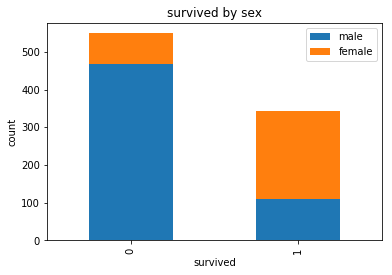

In [13]:
survived_m = dataset.Survived[dataset.Sex=='male'].value_counts()
survived_f = dataset.Survived[dataset.Sex=='female'].value_counts()
df = pd.DataFrame({'male':survived_m, 'female':survived_f})
print(df)
df.plot(kind='bar', stacked=True)
plt.title('survived by sex')
plt.xlabel('survived')
plt.ylabel('count')
plt.show()

看看年龄

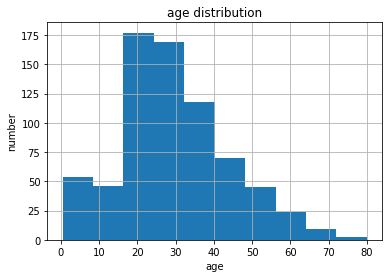

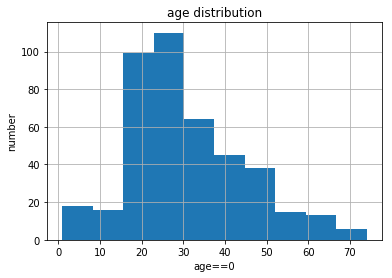

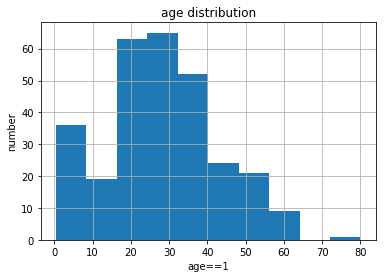

In [17]:
dataset['Age'].hist()
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('number')
plt.show()

dataset.Age[dataset.Survived==0].hist()
plt.title('age distribution')
plt.xlabel('age==0')
plt.ylabel('number')
plt.show()

dataset.Age[dataset.Survived==1].hist()
plt.title('age distribution')
plt.xlabel('age==1')
plt.ylabel('number')
plt.show()

看看船票价钱

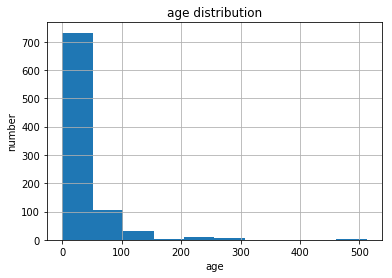

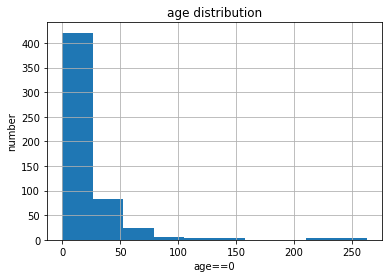

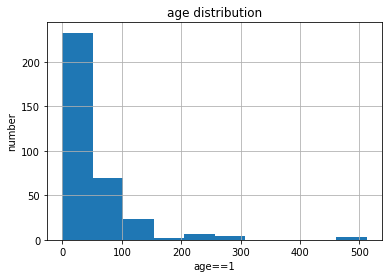

In [18]:
dataset['Fare'].hist()
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('number')
plt.show()

dataset.Fare[dataset.Survived==0].hist()
plt.title('age distribution')
plt.xlabel('age==0')
plt.ylabel('number')
plt.show()

dataset.Fare[dataset.Survived==1].hist()
plt.title('age distribution')
plt.xlabel('age==1')
plt.ylabel('number')
plt.show()

观察乘客舱层

    p1  p2   p3
0   80  97  372
1  136  87  119


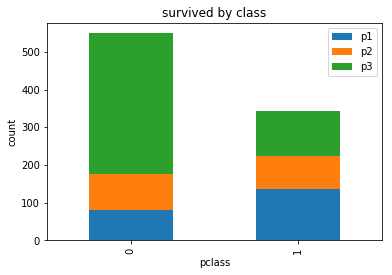

In [21]:
survived_p1 = dataset.Survived[dataset['Pclass']==1].value_counts()
survived_p2 = dataset.Survived[dataset['Pclass']==2].value_counts()
survived_p3 = dataset.Survived[dataset['Pclass']==3].value_counts()

df = pd.DataFrame({'p1':survived_p1,'p2':survived_p2, 'p3':survived_p3})
print(df)
df.plot(kind='bar', stacked=True)
plt.title('survived by class')
plt.xlabel('pclass')
plt.ylabel('count')
plt.show()

观察登船地点

     S   C   Q
0  427  75  47
1  217  93  30


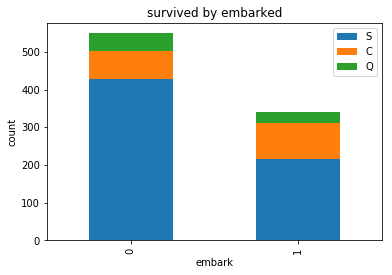

In [22]:
survived_S = dataset.Survived[dataset['Embarked']=='S'].value_counts()
survived_C = dataset.Survived[dataset['Embarked']=='C'].value_counts()
survived_Q = dataset.Survived[dataset['Embarked']=='Q'].value_counts()

df = pd.DataFrame({'S':survived_S,'C':survived_C, 'Q':survived_Q})
print(df)
df.plot(kind='bar', stacked=True)
plt.title('survived by embarked')
plt.xlabel('embark')
plt.ylabel('count')
plt.show()

# 保留下有效数据
pclass, sex, age, fare, embarked

# 分离label 和 训练数据

In [24]:
label = dataset.loc[:,'Survived']
data = dataset.loc[:, ['Sex','Pclass','Age','Fare','Embarked']]
testdat = testset.loc[:, ['Sex','Pclass','Age','Fare','Embarked']]

print(data.shape)
print(testdat.shape)

(891, 5)
(418, 5)


处理空数据

In [26]:
def fill_NAN(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[:, 'Age'] = data_copy['Age'].fillna(data_copy['Age'].median())
    data_copy.loc[:, 'Fare'] = data_copy['Fare'].fillna(data_copy['Fare'].median())
    data_copy.loc[:, 'Pclass'] = data_copy['Pclass'].fillna(data_copy['Pclass'].median())
    data_copy.loc[:, 'Sex'] = data_copy['Sex'].fillna('female')
    data_copy.loc[:, 'Embarked'] = data_copy['Embarked'].fillna('S')
    return data_copy

data_no_nan = fill_NAN(data)
testdat_no_nan = fill_NAN(testdat)

print(data.isnull().values.any())
print(data_no_nan.isnull().values.any())
print(testdat.isnull().isnull().values.any())
print(testdat_no_nan.isnull().values.any())

True
False
False
False


处理Sex 

In [36]:
def transfer_sex(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Sex']=='female','Sex'] = 0
    data_copy.loc[data_copy['Sex']=='male','Sex'] = 1
    return data_copy

data_after_sex = transfer_sex(data_no_nan)
testdat_after_sex = transfer_sex(testdat_no_nan)
print(data_after_sex)

     Sex  Pclass   Age     Fare Embarked
0      1       3  22.0   7.2500        S
1      0       1  38.0  71.2833        C
2      0       3  26.0   7.9250        S
3      0       1  35.0  53.1000        S
4      1       3  35.0   8.0500        S
..   ...     ...   ...      ...      ...
886    1       2  27.0  13.0000        S
887    0       1  19.0  30.0000        S
888    0       3  28.0  23.4500        S
889    1       1  26.0  30.0000        C
890    1       3  32.0   7.7500        Q

[891 rows x 5 columns]


处理Embarked

In [40]:
def transfer_embarked(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Embarked']=='S','Embarked'] = 0;
    data_copy.loc[data_copy['Embarked']=='C','Embarked'] = 1;
    data_copy.loc[data_copy['Embarked']=='Q','Embarked'] = 2;
    return data_copy

data_final = transfer_embarked(data_after_sex)
test_final = transfer_embarked(testdat_after_sex)
print(data_final)

     Sex  Pclass   Age     Fare  Embarked
0      1       3  22.0   7.2500         0
1      0       1  38.0  71.2833         1
2      0       3  26.0   7.9250         0
3      0       1  35.0  53.1000         0
4      1       3  35.0   8.0500         0
..   ...     ...   ...      ...       ...
886    1       2  27.0  13.0000         0
887    0       1  19.0  30.0000         0
888    0       3  28.0  23.4500         0
889    1       1  26.0  30.0000         1
890    1       3  32.0   7.7500         2

[891 rows x 5 columns]


利用KNN训练数据

In [41]:
from sklearn.model_selection import train_test_split

train_data,val_data,train_labels,val_labels = train_test_split(data_final, label, random_state=0, test_size=0.2)


In [42]:
print(train_data.shape, val_data.shape, train_labels.shape, val_labels.shape)

(712, 5) (179, 5) (712,) (179,)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range = range(1,51)
k_scores = []

for K in k_range:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(train_data,train_labels)
    print('K=',K)
    predictions = clf.predict(val_data)
    score = accuracy_score(val_labels, predictions)
    print(score)
    k_scores.append(score)

K= 1
0.6703910614525139
K= 2
0.6871508379888268
K= 3
0.7039106145251397
K= 4
0.6983240223463687
K= 5
0.7318435754189944
K= 6
0.7150837988826816
K= 7
0.7430167597765364
K= 8
0.6983240223463687
K= 9
0.7318435754189944
K= 10
0.7374301675977654
K= 11
0.7318435754189944
K= 12
0.7262569832402235
K= 13
0.7262569832402235
K= 14
0.7206703910614525
K= 15
0.7318435754189944
K= 16
0.7039106145251397
K= 17
0.7374301675977654
K= 18
0.7262569832402235
K= 19
0.7374301675977654
K= 20
0.7374301675977654
K= 21
0.7597765363128491
K= 22
0.7486033519553073
K= 23
0.7541899441340782
K= 24
0.7430167597765364
K= 25
0.7597765363128491
K= 26
0.7430167597765364
K= 27
0.7541899441340782
K= 28
0.7541899441340782
K= 29
0.7597765363128491
K= 30
0.7541899441340782
K= 31
0.7541899441340782
K= 32
0.7541899441340782
K= 33
0.7653631284916201
K= 34
0.7597765363128491
K= 35
0.7653631284916201
K= 36
0.7541899441340782
K= 37
0.7374301675977654
K= 38
0.7541899441340782
K= 39
0.7541899441340782
K= 40
0.7486033519553073
K= 41
0.7

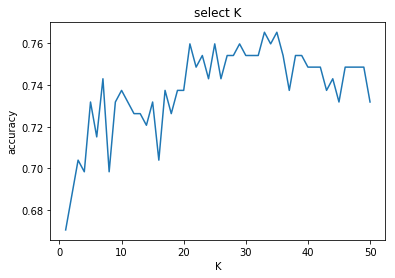

[ 0  1  3  7  2 15  5 13 17 11 12 44 14 49  8 10  4  9 42 36 16 19 18 43
  6 25 23 45 48 46 41 21 40 39 47 38 37 31 30 29 27 26 22 35 33 28 20 24
 34 32]


In [45]:
plt.plot(k_range, k_scores)
plt.title('select K')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.show()
print(np.array(k_scores).argsort())

In [46]:
K = 33
clf = KNeighborsClassifier(n_neighbors = K)
clf.fit(data_final, label)
result = clf.predict(test_final)

print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 0]


In [47]:
df = pd.DataFrame({'PassengerId':testset['PassengerId'],'Survived': result})
df.to_csv('submission.csv', header=True, index=False)

打印输出